In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import scipy as sp
import numpy as np
import warnings
import pySingleCellNet as pySCN

warnings.filterwarnings('ignore')
sc.settings.set_figure_params(dpi=80)

C:\Users\yeaji\anaconda3\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\yeaji\anaconda3\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\yeaji\anaconda3\Lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarning: The 'nopython' keywo

In [2]:
e145 = sc.read("C:/Users/yeaji/OneDrive - Johns Hopkins/PC.project/1. Cartilage devp/data/scRNA/Qin_data/adJointDev_ALL_032322v2.h5ad")

In [3]:
e145.obs['timepoint']=="E14.5"

qb_E12-5_gdf:AAACCTGAGGCGTACAx-0-0-0    False
qb_E12-5_gdf:AAACCTGCACTGCCAGx-0-0-0    False
qb_E12-5_gdf:AAACCTGGTGAGTGACx-0-0-0    False
qb_E12-5_gdf:AAACCTGGTTGCCTCTx-0-0-0    False
qb_E12-5_gdf:AAACCTGTCGAGAACGx-0-0-0    False
                                        ...  
qb_E17-5_gdf:TTGCGTCGTGTGGTTTx-1-1      False
qb_E17-5_gdf:TTTGTCACATCCCACTx-1-1      False
qb_E17-5_gdf:TTGGCAATCACAACGTx-1-1      False
qb_E17-5_gdf:TTTGGTTTCGACGGAAx-1-1      False
qb_E17-5_gdf:TTGGCAAAGTGGGCTAx-1-1      False
Name: timepoint, Length: 12096, dtype: bool

In [4]:
indicator = e145.obs["timepoint"]=="e14.5"
e145 = e145[indicator,:]

In [5]:
e145.write_h5ad("C:/Users/yeaji/OneDrive - Johns Hopkins/PC.project/1. Cartilage devp/data/scRNA/Qin_data/Analysis/e12.5/e145_raw.h5ad")

In [6]:
e145

View of AnnData object with n_obs × n_vars = 1732 × 31065
    obs: 'timepoint', 'ann1', 'level1', 'level2', 'level3', 'topLevel', 'batch'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [7]:
e145.obs

,timepoint,ann1,level1,level2,level3,topLevel,batch
qb_E14-5_gdf:AAACCTGAGCGATGACx-2-0-0,e14.5,joint,SC3,SC3_B,SC3_B1,GLE,0
qb_E14-5_gdf:AAACCTGGTGCCTGCAx-2-0-0,e14.5,joint,SC3,SC3_B,SC3_B2,GLE,0
qb_E14-5_gdf:AAACCTGTCAGAAATGx-2-0-0,e14.5,joint,SC2,SC2_A,SC2_A2,GLE,0
qb_E14-5_gdf:AAACGGGAGAAGGTTTx-2-0-0,e14.5,joint,SC3,SC3_B,SC3_B1,GLE,0
qb_E14-5_gdf:AAACGGGGTCATTAGCx-2-0-0,e14.5,joint,SC2,SC2_A,SC2_A2,GLE,0
...,...,...,...,...,...,...,...
qb_E14-5_gdf:TTTGCGCAGACTAAGTx-2-0-1,e14.5,myocyte,myocyte,myocyte,myocyte,non-GLE,1
qb_E14-5_gdf:TTTGCGCAGTGACTCTx-2-0-1,e14.5,dermis,dermis,dermis,dermis,non-GLE,1
qb_E14-5_gdf:TTTGGTTTCATGTCCCx-2-0-1,e14.5,myocyte,myocyte,myocyte,myocyte,non-GLE,1
qb_E14-5_gdf:TTTGTCAAGCCGCCTAx-2-0-1,e14.5,dermis,dermis,dermis,dermis,non-GLE,1


In [8]:
e145.obs_names

Index(['qb_E14-5_gdf:AAACCTGAGCGATGACx-2-0-0',
       'qb_E14-5_gdf:AAACCTGGTGCCTGCAx-2-0-0',
       'qb_E14-5_gdf:AAACCTGTCAGAAATGx-2-0-0',
       'qb_E14-5_gdf:AAACGGGAGAAGGTTTx-2-0-0',
       'qb_E14-5_gdf:AAACGGGGTCATTAGCx-2-0-0',
       'qb_E14-5_gdf:AAAGATGAGACGCTTTx-2-0-0',
       'qb_E14-5_gdf:AAAGATGAGCTGCAAGx-2-0-0',
       'qb_E14-5_gdf:AAAGCAAAGAGGTTGCx-2-0-0',
       'qb_E14-5_gdf:AAAGCAAGTGCGCTTGx-2-0-0',
       'qb_E14-5_gdf:AAAGCAATCGAATGGGx-2-0-0',
       ...
       'qb_E14-5_gdf:TTTACTGGTGAGTGACx-2-0-1',
       'qb_E14-5_gdf:TTTCCTCAGGTTCCTAx-2-0-1',
       'qb_E14-5_gdf:TTTCCTCCAAAGGTGCx-2-0-1',
       'qb_E14-5_gdf:TTTCCTCCAAGCTGAGx-2-0-1',
       'qb_E14-5_gdf:TTTCCTCCAATGGAGCx-2-0-1',
       'qb_E14-5_gdf:TTTGCGCAGACTAAGTx-2-0-1',
       'qb_E14-5_gdf:TTTGCGCAGTGACTCTx-2-0-1',
       'qb_E14-5_gdf:TTTGGTTTCATGTCCCx-2-0-1',
       'qb_E14-5_gdf:TTTGTCAAGCCGCCTAx-2-0-1',
       'qb_E14-5_gdf:TTTGTCAAGTCATGCTx-2-0-1'],
      dtype='object', length=1732)

In [9]:
e145.var

,Accession,Chromosome,End,Start,Strand
Xkr4,ENSMUSG00000051951,1,3671498,3205901,-
Gm37381,ENSMUSG00000102343,1,3986215,3905739,-
Rp1,ENSMUSG00000025900,1,4409241,3999557,-
Sox17,ENSMUSG00000025902,1,4497354,4490931,-
Gm37323,ENSMUSG00000104328,1,4586252,4583129,-
...,...,...,...,...,...
selection_hygromycinB,selection_hygromycinB,selection_hygromycinB,1025,1,+
selection_kanamycin,selection_kanamycin,selection_kanamycin,794,1,+
selection_neomycin,selection_neomycin,selection_neomycin,815,1,+
selection_puromycin,selection_puromycin,selection_puromycin,599,1,+


# QC

In [10]:
#checks if the gene name (var) starts with 'mt' or 'ribo' via string methods
e145.var['mt']= e145.var_names.str.startswith(("mt-"))
print(sum(e145.var['mt']))

13


In [11]:
e145.var['ribo'] = e145.var_names.str.startswith(("Rps","Rpl"))
print(sum(e145.var['ribo']))

105


In [12]:
e145.var

,Accession,Chromosome,End,Start,Strand,mt,ribo
Xkr4,ENSMUSG00000051951,1,3671498,3205901,-,False,False
Gm37381,ENSMUSG00000102343,1,3986215,3905739,-,False,False
Rp1,ENSMUSG00000025900,1,4409241,3999557,-,False,False
Sox17,ENSMUSG00000025902,1,4497354,4490931,-,False,False
Gm37323,ENSMUSG00000104328,1,4586252,4583129,-,False,False
...,...,...,...,...,...,...,...
selection_hygromycinB,selection_hygromycinB,selection_hygromycinB,1025,1,+,False,False
selection_kanamycin,selection_kanamycin,selection_kanamycin,794,1,+,False,False
selection_neomycin,selection_neomycin,selection_neomycin,815,1,+,False,False
selection_puromycin,selection_puromycin,selection_puromycin,599,1,+,False,False


In [13]:
sc.pp.calculate_qc_metrics(e145, qc_vars=['ribo', 'mt'], percent_top=None, log1p=False, inplace=True)

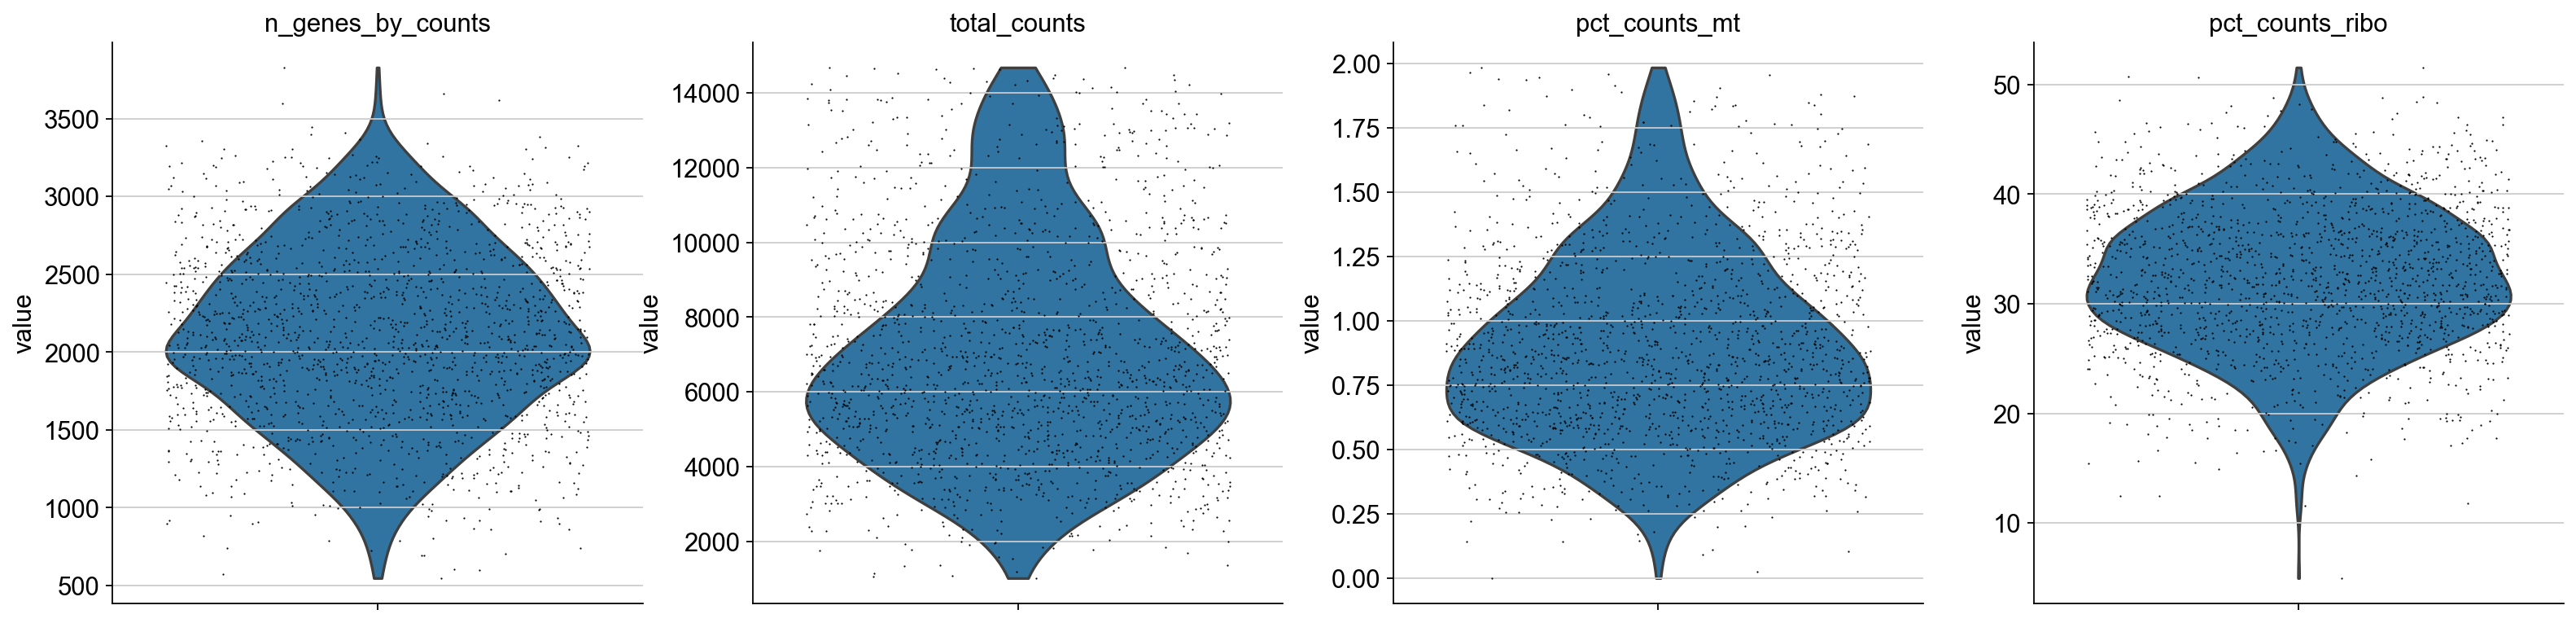

In [14]:
axs = sc.pl.violin(e145, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'],jitter=0.4, multi_panel=True)

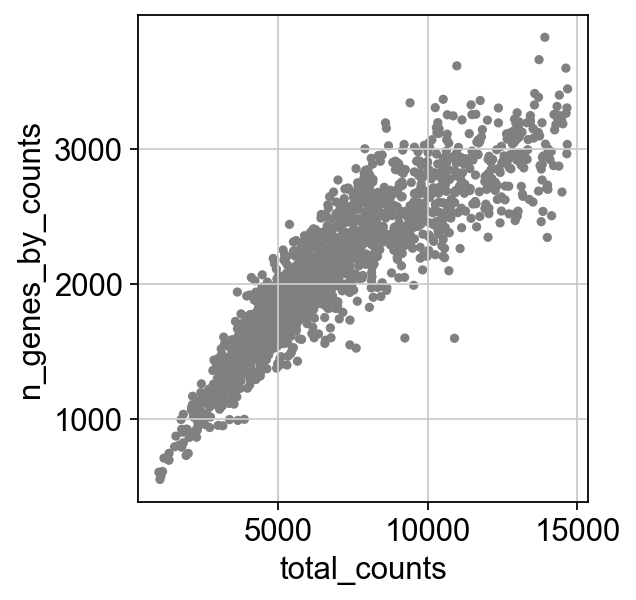

In [15]:
sc.pl.scatter(e145, x='total_counts', y='n_genes_by_counts')

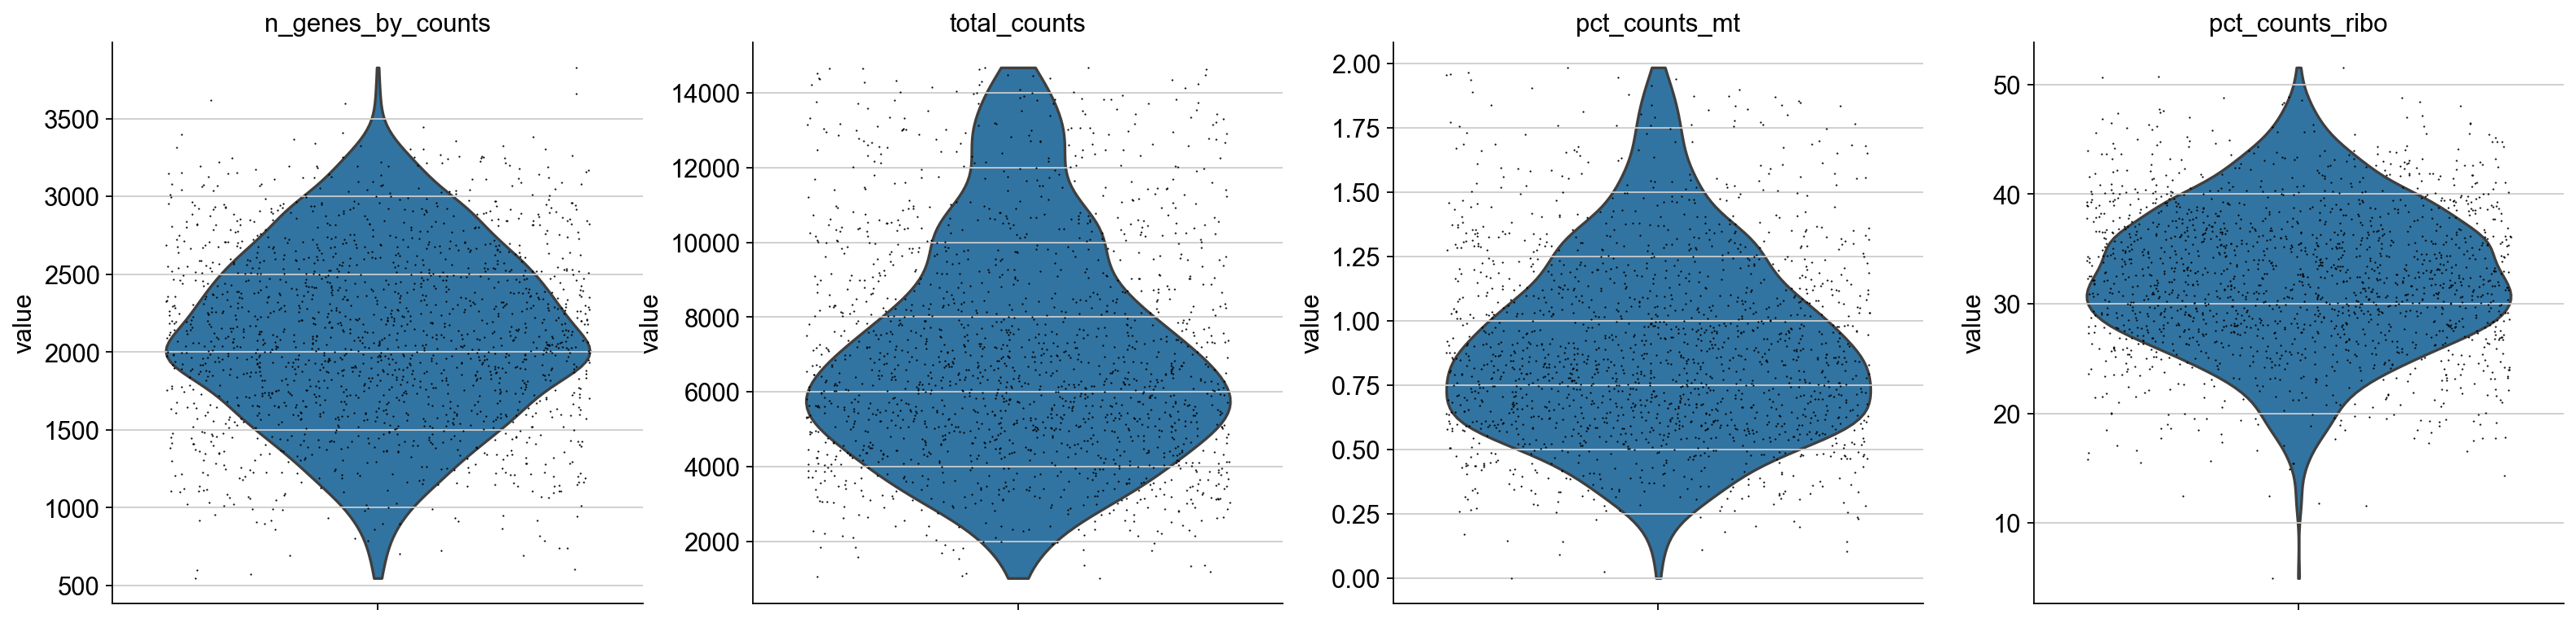

In [16]:
e145 = e145[e145.obs['total_counts'] < 18000, :]
e145 = e145[e145.obs['pct_counts_mt'] < 2.5, :]
# filter for percent ribo > 0.05
e145 = e145[e145.obs['pct_counts_ribo'] < 60, :]
axs = sc.pl.violin(e145, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'],jitter=0.4, multi_panel=True)

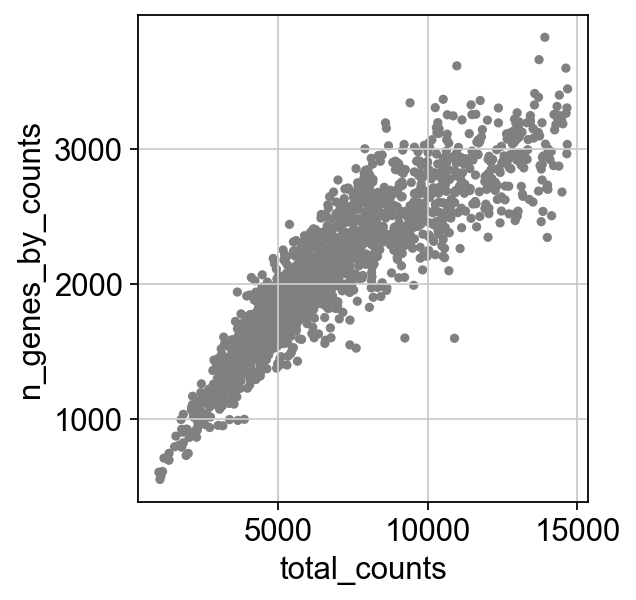

In [17]:
sc.pl.scatter(e145, x='total_counts', y='n_genes_by_counts')

In [18]:
sc.pp.calculate_qc_metrics(e145, qc_vars=['ribo', 'mt'], percent_top=None, log1p=False, inplace=True)

In [19]:
e145 = e145[e145.obs['n_genes_by_counts'] > 500, :]

# Remove genes we don't care about (ribo, malat, mito) and are expressed in less than 5 cells

In [20]:
sc.pp.filter_genes(e145, min_cells=5)


print("Number of cells: ",e145.n_obs)

#save a copy of anndata before normalization 
e145 = e145.copy()

##remove MT, ribo, and maltat reads since these reads are highly abundant, but not relevant to expirement
mito_genes = e145.var_names.str.startswith("mt-")
ribo_genes = e145.var_names.str.startswith(("Rps","Rpl"))
malat_gene = e145.var_names.str.startswith("Malat1")

remove = np.add(mito_genes, ribo_genes)
remove = np.add(remove, malat_gene)
keep = np.invert(remove)

print(len(remove))

print(np.count_nonzero(keep))
print(len(keep) - np.count_nonzero(keep))

e145 = e145[:,keep].copy()

print("Number of genes: ",e145.n_vars)

Number of cells:  1732
13728
13621
107
Number of genes:  13621


# SCN using Qin's data to train

Load in Qin's data

In [21]:
adTrain = sc.read_h5ad("C:/Users/yeaji/OneDrive - Johns Hopkins/PC.project/1. Cartilage devp/data/scRNA/Qin_data/adJointDev_ALL_032322v2.h5ad")

In [22]:
adTrain.var_names_make_unique()

In [23]:
qDat = e145.copy()
qDat.var_names_make_unique()

In [24]:
genesTrain = adTrain.var_names
genesQuery = qDat.var_names
cgenes = genesTrain.intersection(genesQuery)
print(len(cgenes))

adTrain1 = adTrain[:,cgenes]
adQuery = qDat[:,cgenes].copy()
adTrain1 = adTrain1[~adTrain1.obs.index.duplicated()]

13621


In [25]:
qDat.obs

,timepoint,ann1,level1,level2,level3,topLevel,batch,n_genes_by_counts,total_counts,total_counts_ribo,pct_counts_ribo,total_counts_mt,pct_counts_mt
qb_E14-5_gdf:AAACCTGAGCGATGACx-2-0-0,e14.5,joint,SC3,SC3_B,SC3_B1,GLE,0,1662,4384.0,1361.0,31.044706,26.0,0.593066
qb_E14-5_gdf:AAACCTGGTGCCTGCAx-2-0-0,e14.5,joint,SC3,SC3_B,SC3_B2,GLE,0,1407,3466.0,1174.0,33.871899,42.0,1.211771
qb_E14-5_gdf:AAACCTGTCAGAAATGx-2-0-0,e14.5,joint,SC2,SC2_A,SC2_A2,GLE,0,2131,6858.0,2517.0,36.701660,48.0,0.699913
qb_E14-5_gdf:AAACGGGAGAAGGTTTx-2-0-0,e14.5,joint,SC3,SC3_B,SC3_B1,GLE,0,2285,7068.0,1981.0,28.027731,18.0,0.254669
qb_E14-5_gdf:AAACGGGGTCATTAGCx-2-0-0,e14.5,joint,SC2,SC2_A,SC2_A2,GLE,0,1244,3168.0,1127.0,35.574497,37.0,1.167929
...,...,...,...,...,...,...,...,...,...,...,...,...,...
qb_E14-5_gdf:TTTGCGCAGACTAAGTx-2-0-1,e14.5,myocyte,myocyte,myocyte,myocyte,non-GLE,1,2225,9152.0,4255.0,46.492569,151.0,1.649913
qb_E14-5_gdf:TTTGCGCAGTGACTCTx-2-0-1,e14.5,dermis,dermis,dermis,dermis,non-GLE,1,1962,4607.0,1111.0,24.115477,71.0,1.541133
qb_E14-5_gdf:TTTGGTTTCATGTCCCx-2-0-1,e14.5,myocyte,myocyte,myocyte,myocyte,non-GLE,1,2428,10365.0,4539.0,43.791607,159.0,1.534009
qb_E14-5_gdf:TTTGTCAAGCCGCCTAx-2-0-1,e14.5,dermis,dermis,dermis,dermis,non-GLE,1,3411,13578.0,3979.0,29.304758,73.0,0.537634


In [26]:
qDat.var

,Accession,Chromosome,End,Start,Strand,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells
Sox17,ENSMUSG00000025902,1,4497354,4490931,-,False,False,5,0.012125,99.711316,21.0,5
Mrpl15,ENSMUSG00000033845,1,4785739,4773206,-,False,False,260,0.174942,84.988453,303.0,260
Mybl1,ENSMUSG00000025912,1,9700209,9667415,-,False,False,18,0.010393,98.960739,18.0,18
Vcpip1,ENSMUSG00000045210,1,9748382,9718622,-,False,False,200,0.129908,88.452656,225.0,200
Snhg6,ENSMUSG00000098234,1,9944118,9941959,-,False,False,1396,2.251732,19.399538,3900.0,1396
...,...,...,...,...,...,...,...,...,...,...,...,...
Ddx3y,ENSMUSG00000069045,Y,1286629,1260771,-,False,False,907,0.837182,47.632794,1450.0,907
Kdm5d,ENSMUSG00000056673,Y,956786,897788,+,False,False,9,0.005774,99.480370,10.0,9
Eif2s3y,ENSMUSG00000069049,Y,1028847,1010543,+,False,False,560,0.400693,67.667436,694.0,560
Gm29650,ENSMUSG00000099876,Y,1049134,1048393,+,False,False,10,0.005774,99.422633,10.0,10


# Split training data into two to check classifer later

In [27]:
expTrain, expVal = pySCN.splitCommonAnnData(adTrain1, ncells=200,dLevel="level2")

0 : 
22
7 : 
48
1 (chon) : 
90
3 : 
251
4 : 
209
melanocyte : 
15
erythro : 
6
blood : 
286
2 (liga) : 
54
2 : 
354
6 : 
52
9 (divi) : 
141
SC1_A : 
1791
3 (line) : 
49
myocyte : 
1128
8 (prog) : 
123
5 (stro) : 
633
SC1_B : 
895
6 (stro) : 
134
SC2_A : 
627
5 : 
5
dermis : 
964
SC3_A : 
2451
ncc : 
78
7 (prog) : 
51
8 : 
25
SC3_B : 
1070
SC2_B : 
495
endothelial : 
23
4 (synfib) : 
26


# Train the classifer

In [28]:
[cgenesA, xpairs, tspRF] = pySCN.scn_train(expTrain, nTopGenes = 100, nRand = 100, nTrees = 1000, nTopGenePairs = 100, dLevel = "level2", stratify=True, limitToHVG=True)

HVG
Matrix normalized
There are  1628  classification genes

0
1 (chon)
2
2 (liga)
3
3 (line)
4
4 (synfib)
5
5 (stro)
6
6 (stro)
7
7 (prog)
8
8 (prog)
9 (divi)
SC1_A
SC1_B
SC2_A
SC2_B
SC3_A
SC3_B
blood
dermis
endothelial
erythro
melanocyte
myocyte
ncc
There are 2877 top gene pairs

Finished pair transforming the data



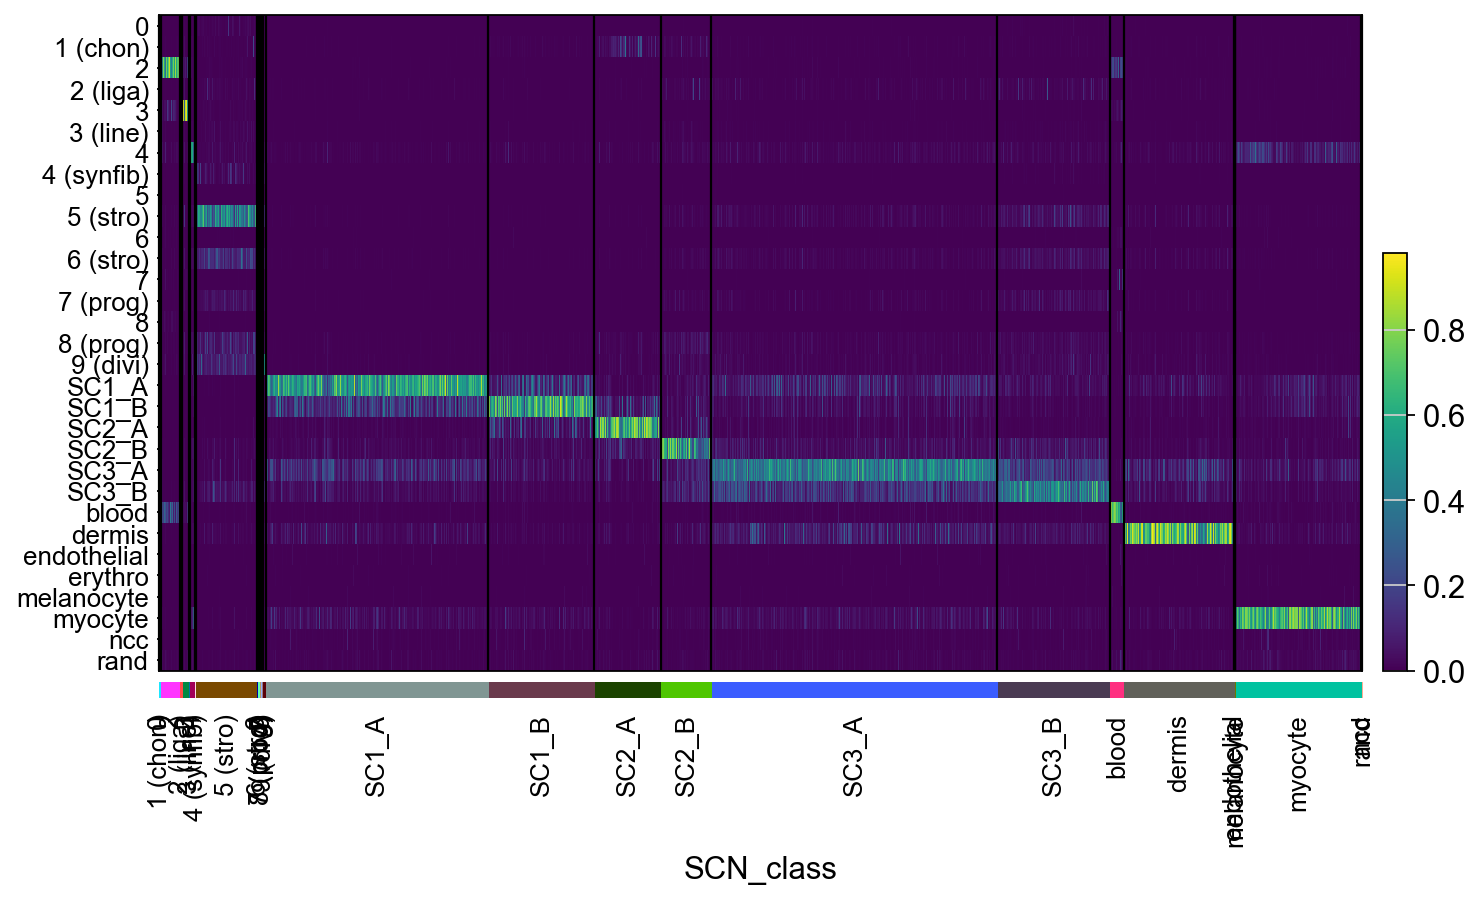

In [29]:
adVal = pySCN.scn_classify(expVal, cgenesA, xpairs, tspRF, nrand = 0)

ax = sc.pl.heatmap(adVal, adVal.var_names.values, groupby='SCN_class', cmap='viridis', dendrogram=False, swap_axes=True)

In [30]:
adQd5 = pySCN.scn_classify(adQuery, cgenesA, xpairs, tspRF, nrand = 0)

In [31]:
adQuery.obs = pd.concat([adQuery.obs, adQd5.obs['SCN_class']], axis=1)

# count normalization

In [32]:
e145 = adQuery.copy()

In [33]:
e145.write_h5ad("C:/Users/yeaji/OneDrive - Johns Hopkins/PC.project/1. Cartilage devp/data/scRNA/Qin_data/Analysis/e12.5/e145_SCN.h5ad")

In [34]:
adata = sc.read_h5ad("C:/Users/yeaji/OneDrive - Johns Hopkins/PC.project/1. Cartilage devp/data/scRNA/Qin_data/Analysis/e12.5/e145_SCN.h5ad")

In [35]:
adata.raw = adata
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [36]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=4, min_disp=0.25)

In [37]:
sc.pp.scale(adata, max_value=10)

# PCA

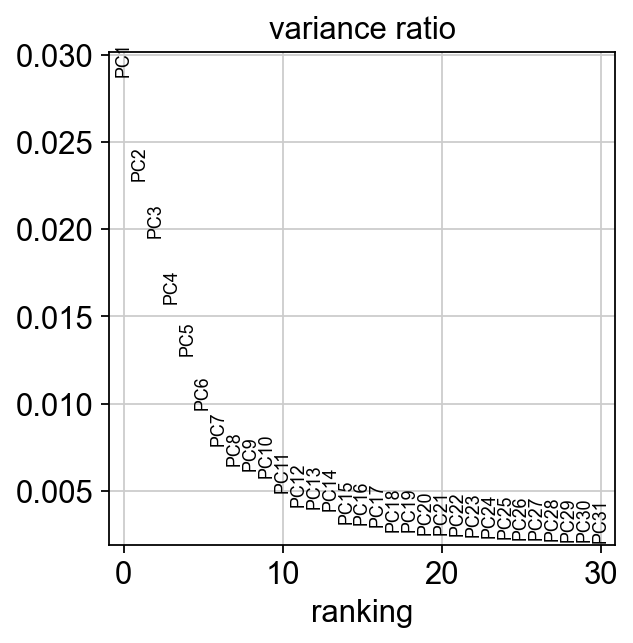

In [38]:
sc.tl.pca(adata, svd_solver='arpack', use_highly_variable=True)
sc.pl.pca_variance_ratio(adata)

# fine neighbors

In [39]:
sc.pp.neighbors(adata)
sc.tl.leiden(adata, resolution =.3)
sc.tl.umap(adata, .25)

In [40]:
adata.obs

,timepoint,ann1,level1,level2,level3,topLevel,batch,n_genes_by_counts,total_counts,total_counts_ribo,pct_counts_ribo,total_counts_mt,pct_counts_mt,SCN_class,leiden
qb_E14-5_gdf:AAACCTGAGCGATGACx-2-0-0,e14.5,joint,SC3,SC3_B,SC3_B1,GLE,0,1662,4384.0,1361.0,31.044706,26.0,0.593066,SC3_B,0
qb_E14-5_gdf:AAACCTGGTGCCTGCAx-2-0-0,e14.5,joint,SC3,SC3_B,SC3_B2,GLE,0,1407,3466.0,1174.0,33.871899,42.0,1.211771,SC3_B,1
qb_E14-5_gdf:AAACCTGTCAGAAATGx-2-0-0,e14.5,joint,SC2,SC2_A,SC2_A2,GLE,0,2131,6858.0,2517.0,36.701660,48.0,0.699913,SC2_A,1
qb_E14-5_gdf:AAACGGGAGAAGGTTTx-2-0-0,e14.5,joint,SC3,SC3_B,SC3_B1,GLE,0,2285,7068.0,1981.0,28.027731,18.0,0.254669,SC3_B,0
qb_E14-5_gdf:AAACGGGGTCATTAGCx-2-0-0,e14.5,joint,SC2,SC2_A,SC2_A2,GLE,0,1244,3168.0,1127.0,35.574497,37.0,1.167929,SC2_A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
qb_E14-5_gdf:TTTGCGCAGACTAAGTx-2-0-1,e14.5,myocyte,myocyte,myocyte,myocyte,non-GLE,1,2225,9152.0,4255.0,46.492569,151.0,1.649913,myocyte,3
qb_E14-5_gdf:TTTGCGCAGTGACTCTx-2-0-1,e14.5,dermis,dermis,dermis,dermis,non-GLE,1,1962,4607.0,1111.0,24.115477,71.0,1.541133,dermis,2
qb_E14-5_gdf:TTTGGTTTCATGTCCCx-2-0-1,e14.5,myocyte,myocyte,myocyte,myocyte,non-GLE,1,2428,10365.0,4539.0,43.791607,159.0,1.534009,myocyte,3
qb_E14-5_gdf:TTTGTCAAGCCGCCTAx-2-0-1,e14.5,dermis,dermis,dermis,dermis,non-GLE,1,3411,13578.0,3979.0,29.304758,73.0,0.537634,dermis,2


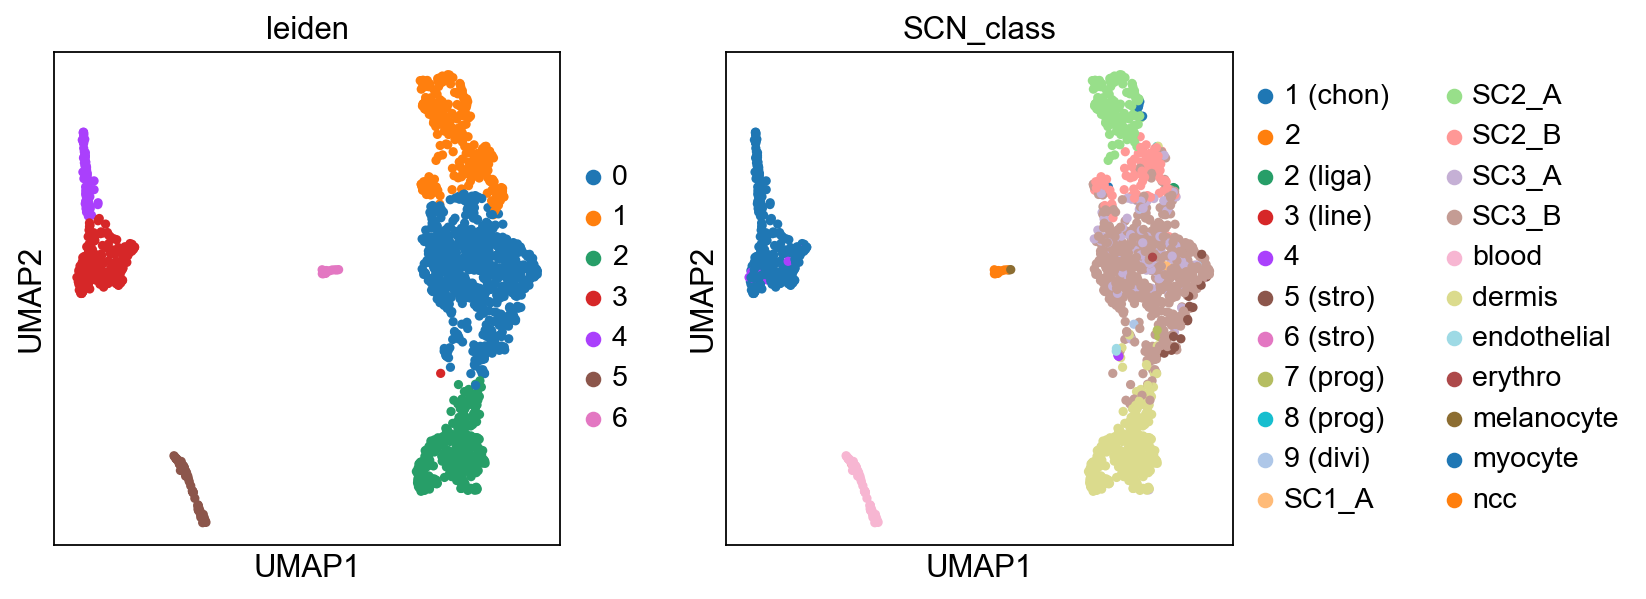

In [41]:
sc.pl.umap(adata, color=['leiden', 'SCN_class'], palette=sc.pl.palettes.default_20, )

In [42]:
adata.var_names

Index(['Sox17', 'Mrpl15', 'Mybl1', 'Vcpip1', 'Snhg6', 'Tcf24', 'Cops5',
       'Arfgef1', 'Cpa6', 'Slco5a1',
       ...
       'Gpm6b', 'Trappc2', 'Arhgap6', 'Gm21887', 'Uty', 'Ddx3y', 'Kdm5d',
       'Eif2s3y', 'Gm29650', 'Gm47283'],
      dtype='object', length=13621)

In [44]:
adata.obs["SCN_class"].value_counts()


SC3_B          641
dermis         305
myocyte        277
SC2_A          164
SC2_B           99
SC3_A           99
blood           67
5 (stro)        21
ncc             20
4               14
2 (liga)         5
1 (chon)         5
9 (divi)         3
7 (prog)         2
endothelial      2
melanocyte       2
SC1_A            1
2                1
8 (prog)         1
6 (stro)         1
3 (line)         1
erythro          1
Name: SCN_class, dtype: int64

In [46]:
adata = adata[~(adata.obs["SCN_class"] == "SC1_A")]
adata = adata[~(adata.obs["SCN_class"] == "2")]
adata = adata[~(adata.obs["SCN_class"] == "8 (prog)")]
adata = adata[~(adata.obs["SCN_class"] == "6 (stro)")]
adata = adata[~(adata.obs["SCN_class"] == "3 (line)")]
adata = adata[~(adata.obs["SCN_class"] == "erythro")]
adata.obs["SCN_class"].value_counts()

SC3_B          641
dermis         305
myocyte        277
SC2_A          164
SC2_B           99
SC3_A           99
blood           67
5 (stro)        21
ncc             20
4               14
1 (chon)         5
2 (liga)         5
9 (divi)         3
7 (prog)         2
endothelial      2
melanocyte       2
Name: SCN_class, dtype: int64

In [50]:
adata.obs['SCN_class'] == "SC2_A"
indicator = adata.obs["SCN_class"] == "SC2_A"
adata_SC2_A = adata [indicator,:]

adata_SC2_A.var['total_expression'] = adata_SC2_A.X.sum(0)
adata_SC2_A.var['total_expression'].nlargest(100) 
top_expression_genes_adata_SC2_A = adata_SC2_A.var['total_expression'].nlargest(100)
top_expression_genes_adata_SC2_A_df = pd.DataFrame(top_expression_genes_adata_SC2_A)
top_expression_genes_adata_SC2_A_df.to_excel('C:/Users/yeaji/OneDrive - Johns Hopkins/PC.project/1. Cartilage devp/data/scRNA/Qin_data/Analysis/e12.5/excel/SCN_cluster/e145_highly_expr_genes_SC2_A.xlsx', index=True)

In [51]:
adata.obs['SCN_class'] == "SC2_B"
indicator = adata.obs["SCN_class"] == "SC2_B"
adata_SC2_B = adata [indicator,:]

adata_SC2_B.var['total_expression'] = adata_SC2_B.X.sum(0)
adata_SC2_B.var['total_expression'].nlargest(100) 
top_expression_genes_adata_SC2_B = adata_SC2_B.var['total_expression'].nlargest(100)
top_expression_genes_adata_SC2_B_df = pd.DataFrame(top_expression_genes_adata_SC2_B)
top_expression_genes_adata_SC2_B_df.to_excel('C:/Users/yeaji/OneDrive - Johns Hopkins/PC.project/1. Cartilage devp/data/scRNA/Qin_data/Analysis/e12.5/excel/SCN_cluster/e145_highly_expr_genes_SC2_B.xlsx', index=True)

In [54]:
adata.obs['SCN_class'] == "SC3_B"
indicator = adata.obs["SCN_class"] == "SC3_B"
adata_SC3_B = adata [indicator,:]

adata_SC3_B.var['total_expression'] = adata_SC3_B.X.sum(0)
adata_SC3_B.var['total_expression'].nlargest(100) 
top_expression_genes_adata_SC3_B = adata_SC3_B.var['total_expression'].nlargest(100)
top_expression_genes_adata_SC3_B_df = pd.DataFrame(top_expression_genes_adata_SC3_B)
top_expression_genes_adata_SC3_B_df.to_excel('C:/Users/yeaji/OneDrive - Johns Hopkins/PC.project/1. Cartilage devp/data/scRNA/Qin_data/Analysis/e12.5/excel/SCN_cluster/e145_highly_expr_genes_SC3_A.xlsx', index=True)

In [55]:
adata.obs['SCN_class'] == "SC3_B"
indicator = adata.obs["SCN_class"] == "SC3_B"
adata_SC3_B = adata [indicator,:]

adata_SC3_B.var['total_expression'] = adata_SC3_B.X.sum(0)
adata_SC3_B.var['total_expression'].nlargest(100) 
top_expression_genes_adata_SC3_B = adata_SC3_B.var['total_expression'].nlargest(100)
top_expression_genes_adata_SC3_B_df = pd.DataFrame(top_expression_genes_adata_SC3_B)
top_expression_genes_adata_SC3_B_df.to_excel('C:/Users/yeaji/OneDrive - Johns Hopkins/PC.project/1. Cartilage devp/data/scRNA/Qin_data/Analysis/e12.5/excel/SCN_cluster/e145_highly_expr_genes_SC3_B.xlsx', index=True)